In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

df['Experience'] = df['Experience'].abs()

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

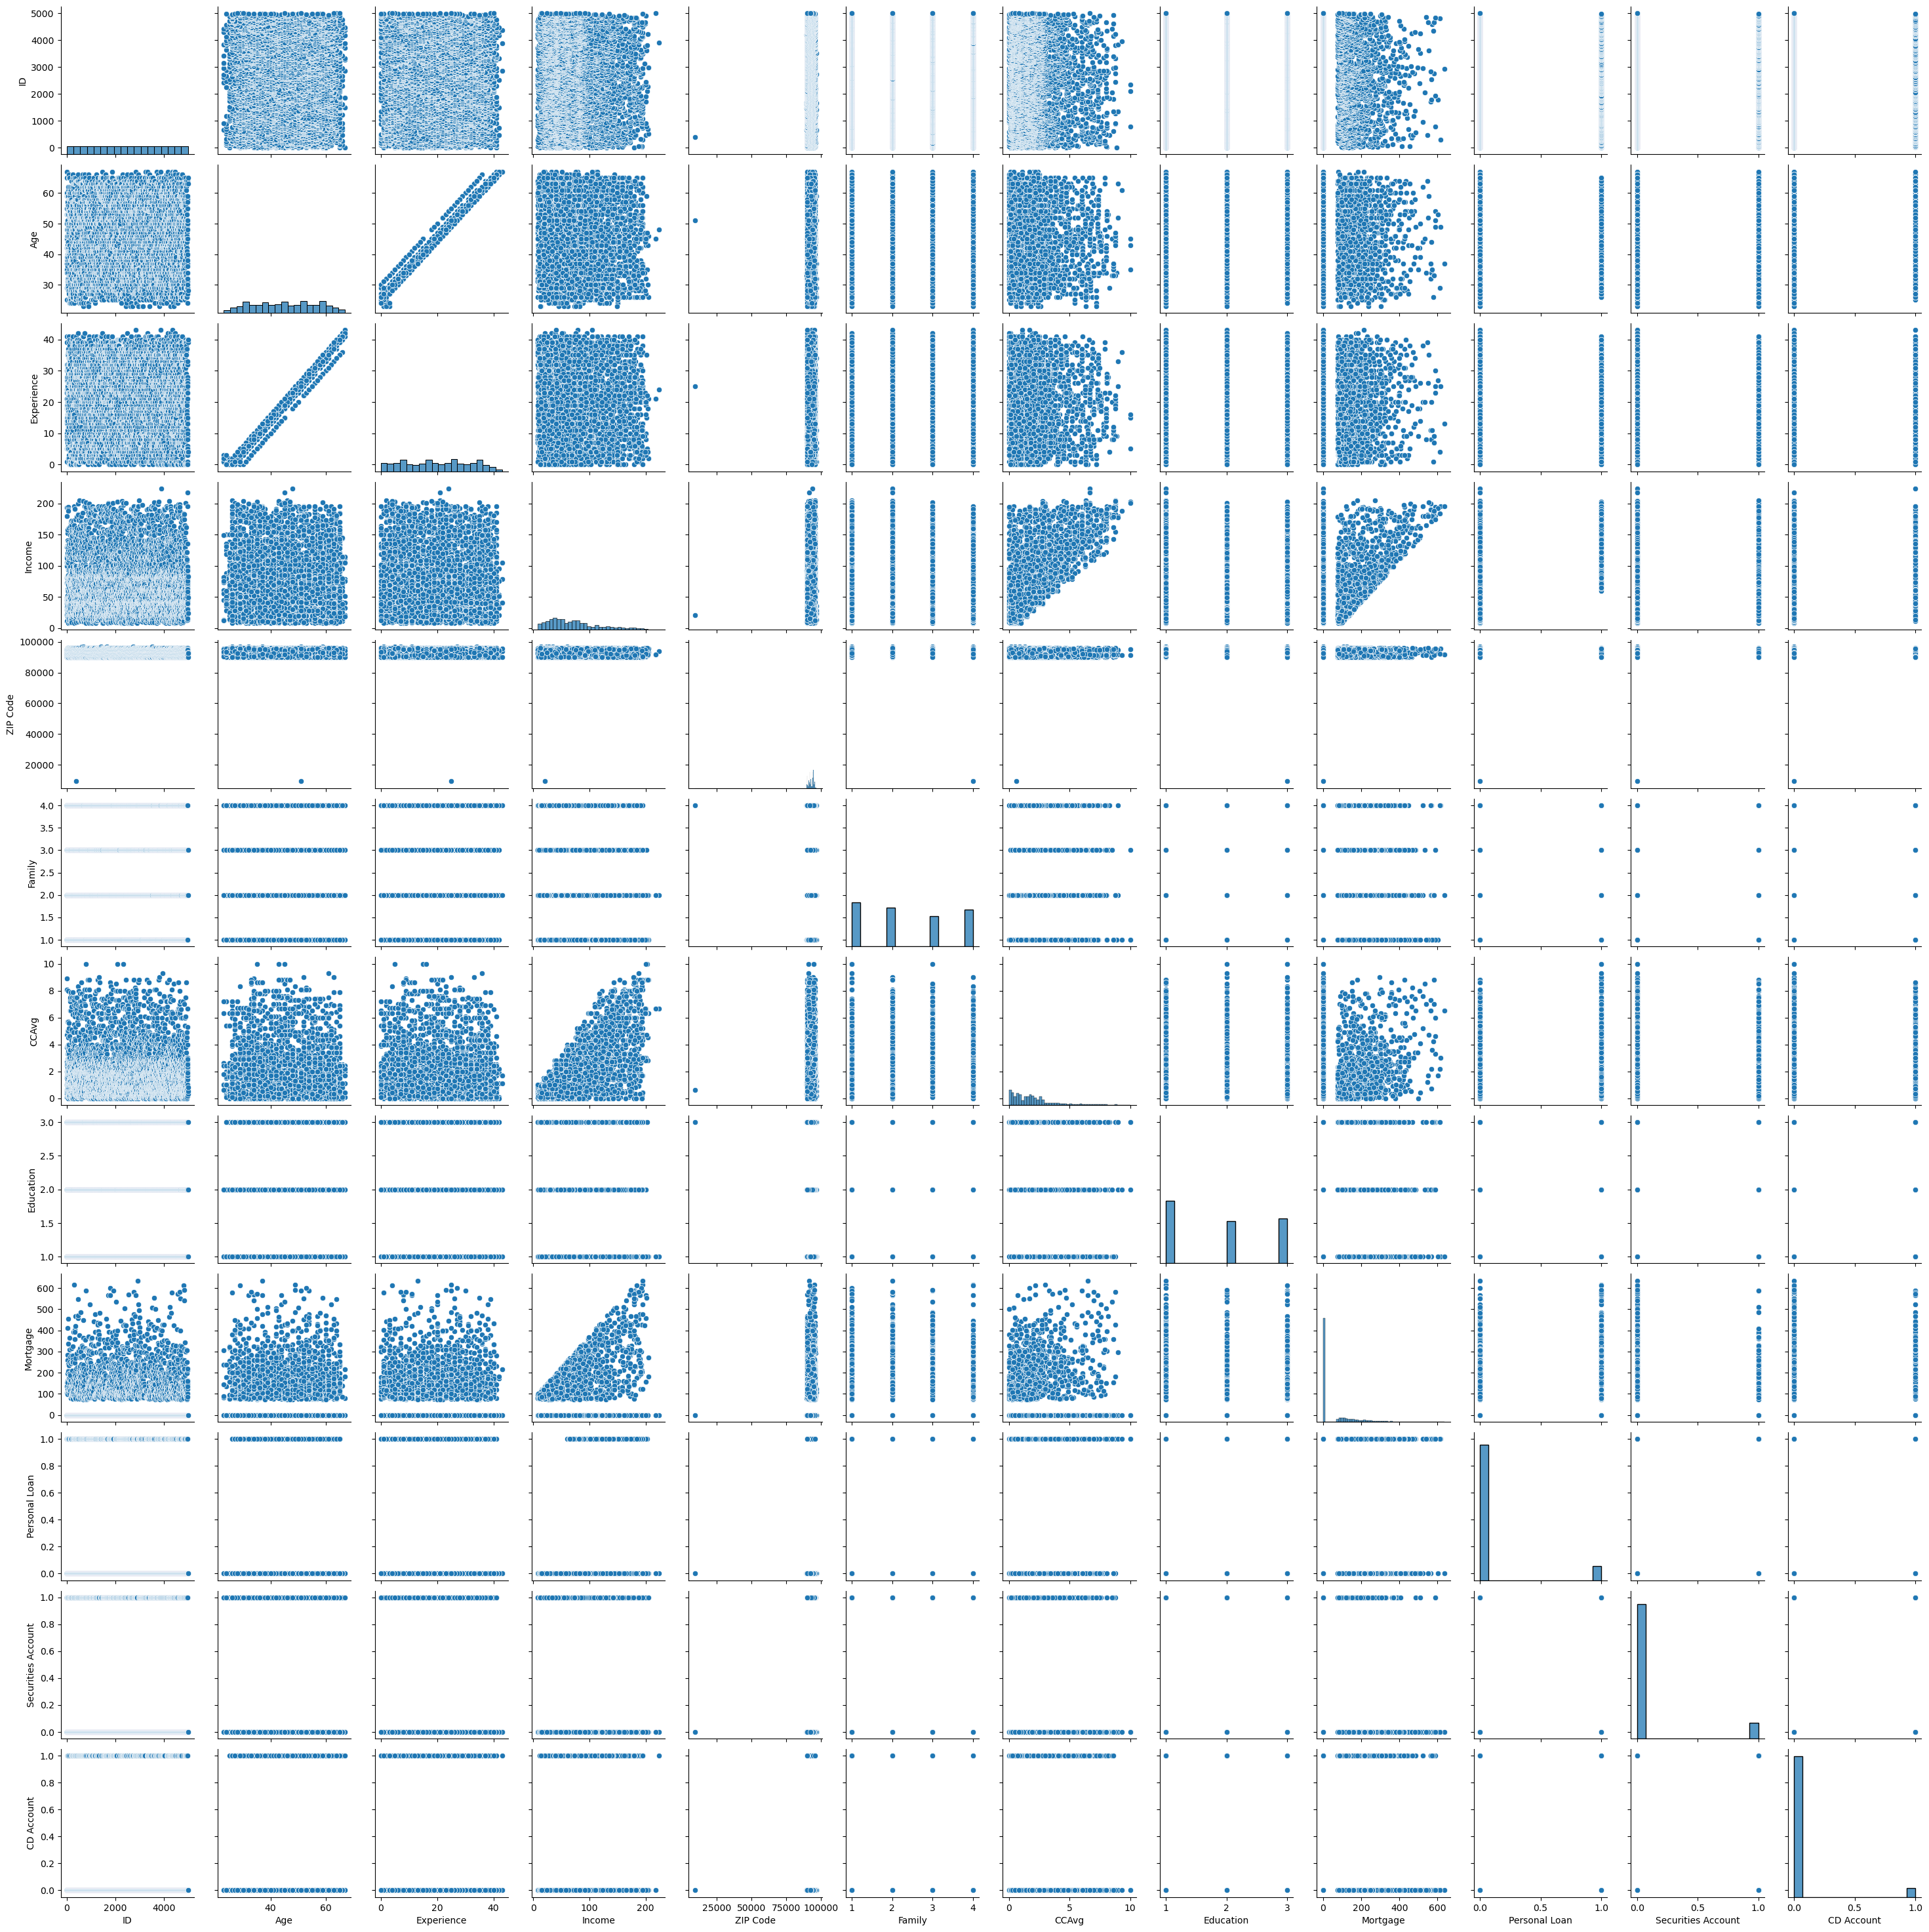

In [6]:
#importing seaborn for statistical plots
import seaborn as sns
df_attr = df.iloc[:,0:12] #compare all attributes visually to check for relationships that can be exploited

sns.pairplot(df_attr)

In [ ]:
# Age and experience have strong positive relation
# Age and income have no linear relationship
# Age and experience have no linear relationship

In [7]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
df.groupby(["Personal Loan"]).count()  #The data set is skewed in terms of target column.
# There are far few records in class 1 i.e. people who took the personal loan last time. But that 
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed. 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [9]:
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array

X_df = df.loc[:, df.columns != 'Personal Loan']
y_df = df.loc[:, df.columns == 'Personal Loan']

 --------------------------- Logistic Model --------------------------------------

In [10]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
# Prepare data for logistic regression

features=X_df.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y_df.values


test_size = 0.40 # taking 60:40 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test data

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

In [11]:
# Let us first try logistic regression to predict the personal loan affinity - 
# We removed the binned columns for this (considered only 11 columns 1:10) which are numeric

model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9135
[[1769   47]
 [ 126   58]]


In [12]:
# The accuracy score of .954 looks impressive but do not forget, it is unreliable as it is a score at
# model level. Let us look at class level, especially the class 1.

# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1816
           1       0.55      0.32      0.40       184

    accuracy                           0.91      2000
   macro avg       0.74      0.64      0.68      2000
weighted avg       0.90      0.91      0.90      2000



In [ ]:
#The precision and recall for class 1 is low...

#Precision: Within a given set of positively-labeled results, the fraction that were 
#true positives = tp/(tp + fp) , this has to be calculated for each class i.e. 0 and 1 and should be
# high for the class less represented, class 1 in our example

#Recall: Given a set of positively-labeled results, the fraction of all positives that were 
#retrieved = tp/(tp + fn)

# Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. 
# Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. 
# Accuracy is 80+2 / 100 i.e. 82%

# F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R)
#When B is set to 1 we get F1 = 2PR / (P+R)

 ----------------------- Naive Bayes Model ---------------------------------

In [13]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
# Prepare data for logistic regression

features=X_df.iloc[:, 0:10]

target_labels = df.loc[:, df.columns == 'Personal Loan']


X_array = features.values
y_array = target_labels.values


test_size = 0.40 # taking 60:40 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_array, y_array, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

In [14]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

predictions=model.predict(X_test)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))

[[1692  124]
 [  74  110]]


In [15]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1816
           1       0.47      0.60      0.53       184

    accuracy                           0.90      2000
   macro avg       0.71      0.76      0.74      2000
weighted avg       0.91      0.90      0.91      2000



In [ ]:
## Naive Bayes also is not giving the class 1 metrics in the acceptal range (80% and above). Let us try
## K Nearest Neighbours

 ------------------------------ K Nearest Neighbours ------------------------------------

In [16]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [17]:
predicted_labels = NNH.predict(X_test)

In [18]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1783   33]
 [ 169   15]]


In [19]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1816
           1       0.31      0.08      0.13       184

    accuracy                           0.90      2000
   macro avg       0.61      0.53      0.54      2000
weighted avg       0.86      0.90      0.87      2000



In [20]:
### Recall (true positives / (true positives + false negatives)) for class 1 is the least. That is 
### because majority of data points belong to class 0 and in KNN, probability of finding data points
### from class 0 closer to a test point than a data point from class 1 is high.

In [21]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [23]:
predicted_labels = NNH.predict(X_test_scaled)

In [24]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1809    7]
 [  78  106]]


In [25]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1816
           1       0.94      0.58      0.71       184

    accuracy                           0.96      2000
   macro avg       0.95      0.79      0.85      2000
weighted avg       0.96      0.96      0.95      2000



In [ ]:
## scaled KNN algorithm gives the best result for class 1 till now. Let us check decision tree

In [26]:
DTC = DecisionTreeClassifier(criterion='gini')
DTC.fit(X_train, y_train)

predictions=DTC.predict(X_test)

In [27]:
#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))

[[1798   18]
 [  19  165]]


In [28]:
# make predictions
expected = y_test
predicted = DTC.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1816
           1       0.90      0.90      0.90       184

    accuracy                           0.98      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.98      0.98      0.98      2000



In [ ]:
# As we can see the decision tree giving better results compared to other models.